## IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## IMPORT CSV FILE

In [2]:
df = pd.read_csv("iris.csv",header=None)

In [3]:
df.columns= ["x1","x2","x3","x4","type"]

In [4]:
df = df.loc[ 0:99]

In [5]:
df.head()

,x1,x2,x3,x4,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## DATA PREPARATION

In [6]:
def conTypetoNum(type) :
    if (type=='Iris-setosa') : return 0
    else : return 1

In [7]:
df['type(num)'] = df['type'].apply(conTypetoNum)

In [8]:
df['theta1'],df['theta2'],df['theta3'],df['theta4'],df['bias'],df['result'],df['activation'] = 0,0,0,0,0,0,0
df['dtheta1'],df['dtheta2'],df['dtheta3'],df['dtheta4'],df['dbias'],df['prediction'],df['error'] = 0,0,0,0,0,0,0

In [9]:
df.head()

,x1,x2,x3,x4,type,type(num),theta1,theta2,theta3,theta4,bias,result,activation,dtheta1,dtheta2,dtheta3,dtheta4,dbias,prediction,error
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## TRAINING METHOD

In [10]:
def train(data,t1,t2,t3,t4,b,alfa) :
    #inisialisasi
    correct = 0
    row = data['type'].count()
    data.loc[0,'theta1']  = t1
    data.loc[0,'theta2']  = t2
    data.loc[0,'theta3']  = t3
    data.loc[0,'theta4']  = t4
    data.loc[0,'bias'] = b
    data.loc[0,'result'] = data.loc[0,'x1']*data.loc[0,'theta1']+data.loc[0,'x2']*data.loc[0,'theta2']+data.loc[0,'x3']*data.loc[0,'theta3']+data.loc[0,'x4']*data.loc[0,'theta4']+data.loc[0,'bias']
    data.loc[0,'activation'] = 1/(1+np.exp(-1*data.loc[0,'result']))
    data.loc[0,'dtheta1'] = 2*data.loc[0,'x1']*(data.loc[0,'type(num)']-data.loc[0,'activation'])*(1-data.loc[0,'activation'])*data.loc[0,'activation']
    data.loc[0,'dtheta2'] = 2*data.loc[0,'x2']*(data.loc[0,'type(num)']-data.loc[0,'activation'])*(1-data.loc[0,'activation'])*data.loc[0,'activation']         
    data.loc[0,'dtheta3'] = 2*data.loc[0,'x3']*(data.loc[0,'type(num)']-data.loc[0,'activation'])*(1-data.loc[0,'activation'])*data.loc[0,'activation']
    data.loc[0,'dtheta4'] = 2*data.loc[0,'x4']*(data.loc[0,'type(num)']-data.loc[0,'activation'])*(1-data.loc[0,'activation'])*data.loc[0,'activation']
    data.loc[0,'dbias']   = 2*(data.loc[0,'type(num)']-data.loc[0,'activation'])*(1-data.loc[0,'activation'])*data.loc[0,'activation']
    
    for i in range(1,row) :
        data.loc[i,'theta1']  = data.loc[i-1,'theta1']+alfa*data.loc[i-1,'dtheta1']
        data.loc[i,'theta2']  = data.loc[i-1,'theta2']+alfa*data.loc[i-1,'dtheta2']
        data.loc[i,'theta3']  = data.loc[i-1,'theta3']+alfa*data.loc[i-1,'dtheta3']
        data.loc[i,'theta4']  = data.loc[i-1,'theta4']+alfa*data.loc[i-1,'dtheta4']
        data.loc[i,'bias'] = data.loc[i-1,'bias']+alfa*data.loc[i-1,'dbias']
        data.loc[i,'result']  = data.loc[i,'x1']*data.loc[i,'theta1']+data.loc[i,'x2']*data.loc[i,'theta2']+data.loc[i,'x3']*data.loc[i,'theta3']+data.loc[i,'x4']*data.loc[i,'theta4']+data.loc[i,'bias']
        data.loc[i,'activation'] = 1/(1+np.exp(-1*data.loc[i,'result']))
        data.loc[i,'dtheta1'] = 2*data.loc[i,'x1']*(data.loc[i,'type(num)']-data.loc[i,'activation'])*(1-data.loc[i,'activation'])*data.loc[i,'activation']
        data.loc[i,'dtheta2'] = 2*data.loc[i,'x2']*(data.loc[i,'type(num)']-data.loc[i,'activation'])*(1-data.loc[i,'activation'])*data.loc[i,'activation'] 
        data.loc[i,'dtheta3'] = 2*data.loc[i,'x3']*(data.loc[i,'type(num)']-data.loc[i,'activation'])*(1-data.loc[i,'activation'])*data.loc[i,'activation']
        data.loc[i,'dtheta4'] = 2*data.loc[i,'x4']*(data.loc[i,'type(num)']-data.loc[i,'activation'])*(1-data.loc[i,'activation'])*data.loc[i,'activation']
        data.loc[i,'dbias']   = 2*(data.loc[i,'type(num)']-data.loc[i,'activation'])*(1-data.loc[i,'activation'])*data.loc[i,'activation']
    for i in range (1,row) :
        if (data.loc[i,'activation']>0.5) : data.loc[i,'prediction'] = 1
        else : data.loc[i,'prediction'] = 0
        if (data.loc[i,'type(num)']==data.loc[i,'prediction']) : correct = correct+1
    #return data
    error = 2*(data.loc[row-1,'type(num)']-data.loc[row-1,'activation'])*(data.loc[row-1,'type(num)']-data.loc[row-1,'activation'])
    accuracy = correct/row
    return [data.loc[row-1,'theta1'],data.loc[row-1,'theta2'],data.loc[row-1,'theta3'],data.loc[row-1,'theta4'],data.loc[row-1,'bias'],error,accuracy]

## VALIDATION METHOD

In [11]:
def valid(data,t1,t2,t3,t4,b) :
    correct =  0
    toterror = 0
    row = data['type'].count()
    for i in range(1,row) :
        data.loc[i,'result']  = data.loc[i,'x1']*t1+data.loc[i,'x2']*t2+data.loc[i,'x3']*t3+data.loc[i,'x4']*t4+b
        data.loc[i,'activation'] = 1/(1+np.exp(-1*data.loc[i,'result']))
        data.loc[i,'error'] = 2*(data.loc[i,'type(num)']-data.loc[i,'activation'])*(data.loc[i,'type(num)']-data.loc[i,'activation'])
        toterror = toterror + data.loc[i,'error']
        if (data.loc[i,'activation']>0.5) : data.loc[i,'prediction'] = 1
        else : data.loc[i,'prediction'] = 0
        if (data.loc[i,'type(num)']==data.loc[i,'prediction']) : correct = correct+1
    #return data
    return [correct/row,toterror/row]

## MEMBAGI DATA KE DALAM 5 BAGIAN

In [12]:
k = 5
dataValid = []
dataTrain = []
th1,th2,th3,th4,bias,alfa = 0.5,0.5,0.5,0.5,0.5,0.1
per = df['type'].count()//k
for i in range (k) :
    dataValid.append(df.loc[i*per:i*per+per-1].reset_index(drop=True))
    dataTrain.append(df.drop([i for i in range(i*per,i*per+per)]).reset_index(drop=True))

In [13]:
errorTrain = []
errorValid = []
accuracyTrain = []
accuracyValid = []

## TRAINING DAN VALIDATION

In [14]:
epoch = 300
for i in range(epoch) : 
    totErrValid = 0
    totErrTrain = 0
    totAccValid = 0
    totAccTrain = 0
    for j in range(k) :
        th1,th2,th3,th4,bias,errTrain,accTrain = train(dataTrain[j],th1,th2,th3,th4,bias,alfa)
        accValid,errValid = valid(dataValid[j],th1,th2,th3,th4,bias)
        totErrValid = totErrValid + errValid
        totErrTrain = totErrTrain + errTrain
        totAccTrain = totAccTrain + accTrain
        totAccValid = totAccValid + accValid
    errorTrain.append(totErrTrain/k)
    errorValid.append(totErrValid/k)
    accuracyTrain.append(totAccTrain/k)
    accuracyValid.append(totAccValid/k)

## HASIL

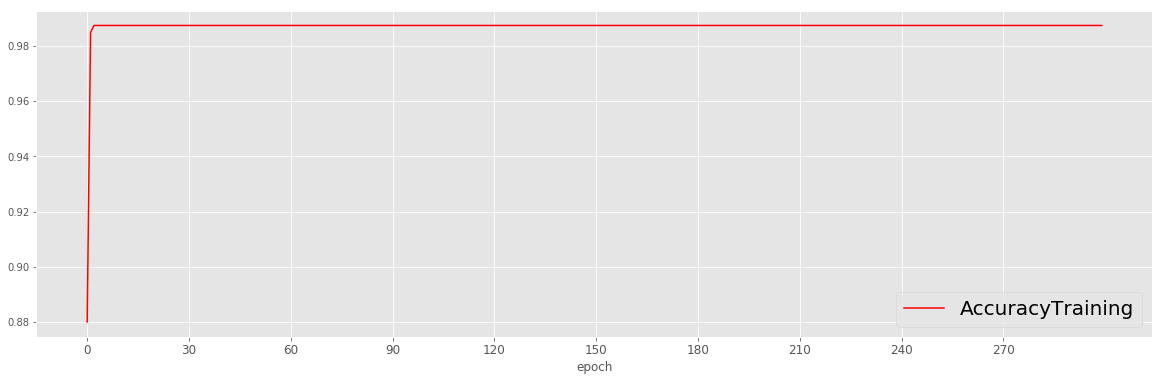

In [37]:
plt.figure(figsize = (20, 6))
plt.plot(accuracyTrain,'r', label = 'AccuracyTraining')
plt.xticks(range(0, 300,30), size = 12)
plt.legend(fontsize = 20)
plt.xlabel('epoch')
plt.show()

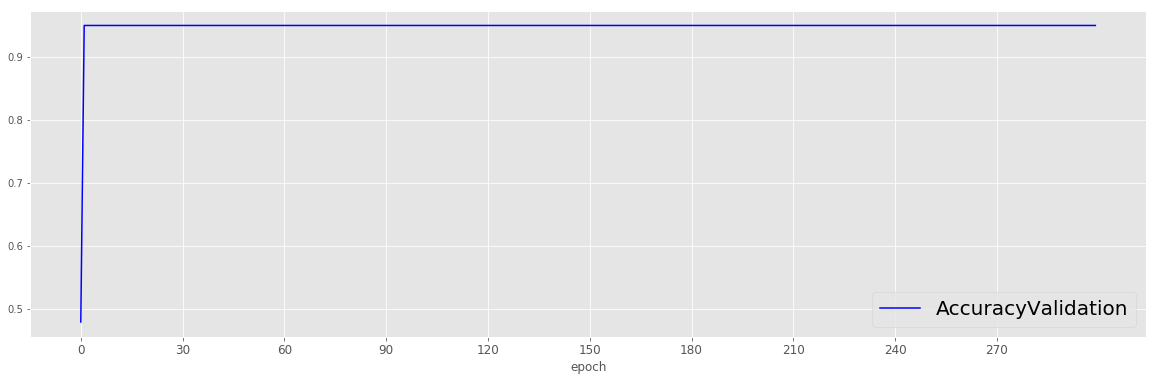

In [38]:
plt.figure(figsize = (20, 6))
plt.plot(accuracyValid,'b', label = 'AccuracyValidation')
plt.xticks(range(0, 300,30), size = 12)
plt.legend(fontsize = 20)
plt.xlabel('epoch')
plt.show()

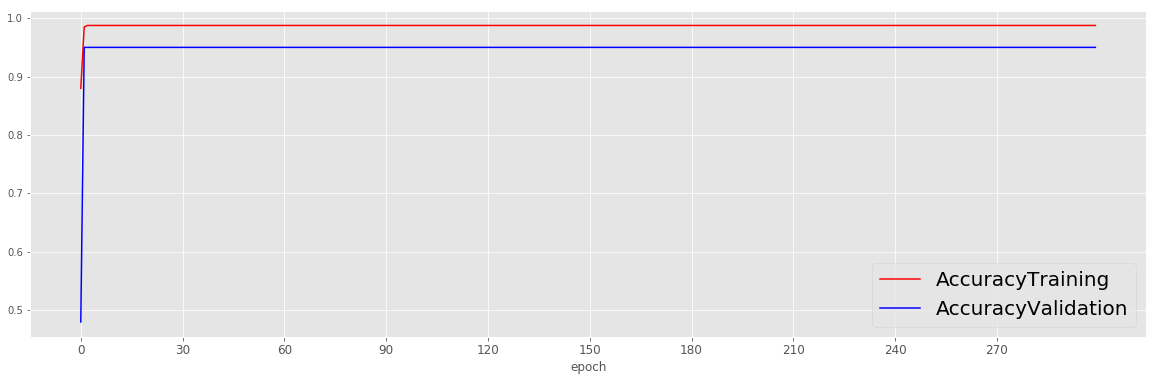

In [15]:
plt.figure(figsize = (20, 6))
plt.plot(accuracyTrain,'r', label = 'AccuracyTraining')
plt.plot(accuracyValid,'b', label = 'AccuracyValidation')
plt.xticks(range(0, 300,30), size = 12)
plt.legend(fontsize = 20)
plt.xlabel('epoch')
plt.show()

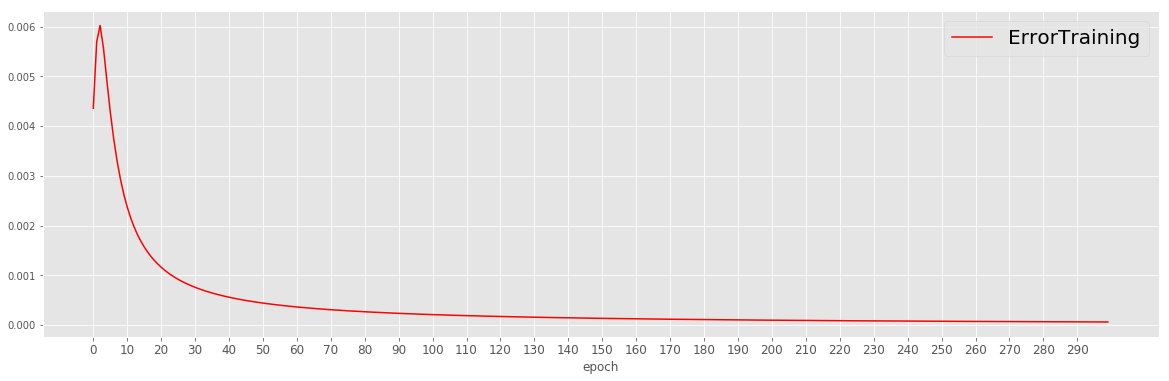

In [39]:
plt.figure(figsize = (20, 6))
plt.plot(errorTrain,'r', label = 'ErrorTraining')
plt.xticks(range(0, 300,10), size = 12)
plt.legend(fontsize = 20)
plt.xlabel('epoch')
plt.show()

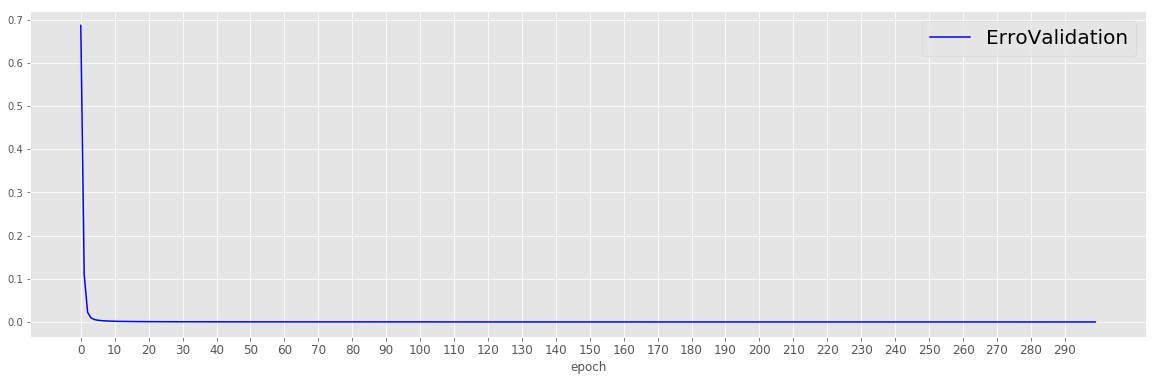

In [40]:
plt.figure(figsize = (20, 6))
plt.plot(errorValid,'b', label = 'ErroValidation')
plt.xticks(range(0, 300,10), size = 12)
plt.legend(fontsize = 20)
plt.xlabel('epoch')
plt.show()

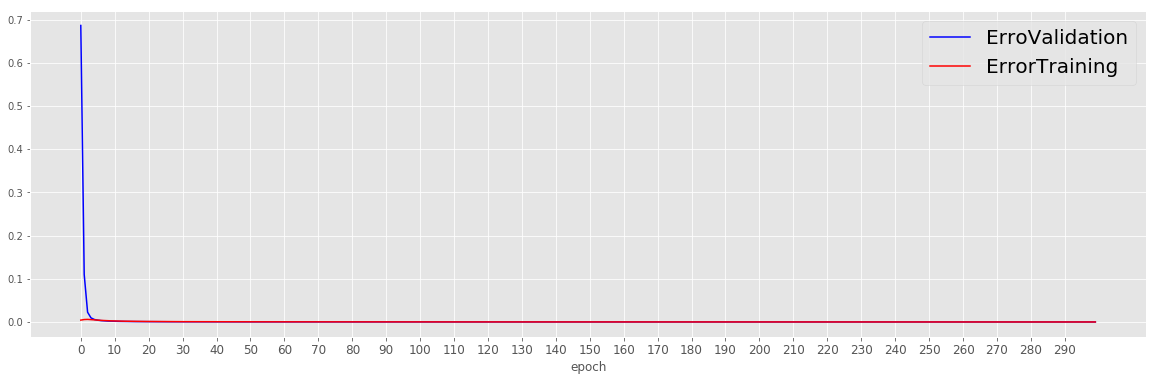

In [36]:
plt.figure(figsize = (20, 6))
plt.plot(errorValid,'b', label = 'ErroValidation')
plt.plot(errorTrain,'r', label = 'ErrorTraining')
plt.xticks(range(0, 300,10), size = 12)
plt.legend(fontsize = 20)
plt.xlabel('epoch')
plt.show()

In [17]:
print('theta 1 = %.2f\ntheta 2 = %.2f\ntheta 3 = %.2f\ntheta 4 = %.2f\nbias = %.2f\n' % (th1,th2,th3,th4,bias))

theta 1 = -0.87
theta 2 = -2.27
theta 3 = 3.76
theta 4 = 2.13
bias = -0.09

